/Users/billy/Desktop/imcTrading/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/billy/Desktop/imcTrading/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/billy/Desktop/imcTrading/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/billy/Desktop/imcTrading/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/billy/Desktop/imcTrading/venv/lib/python3.11/site-packages/statsmodels/tsa/base/t

                               SARIMAX Results                                
Dep. Variable:              mid_price   No. Observations:                10000
Model:                 ARIMA(1, 1, 1)   Log Likelihood              111809.736
Date:                Sat, 25 Mar 2023   AIC                        -223613.472
Time:                        14:14:31   BIC                        -223591.841
Sample:                             0   HQIC                       -223606.150
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0987      0.000    388.651      0.000       0.098       0.099
ma.L1         -0.3495      0.000  -1331.684      0.000      -0.350      -0.349
sigma2      2.369e-11   1.92e-11      1.233      0.2

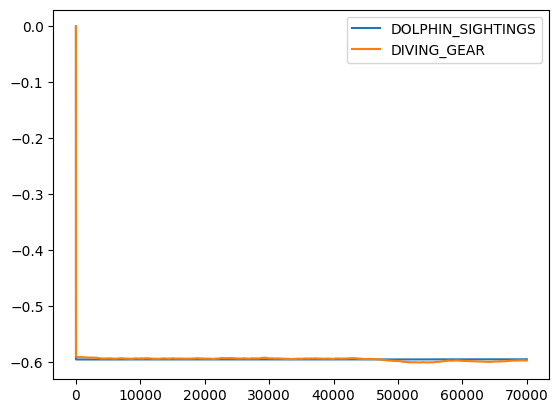

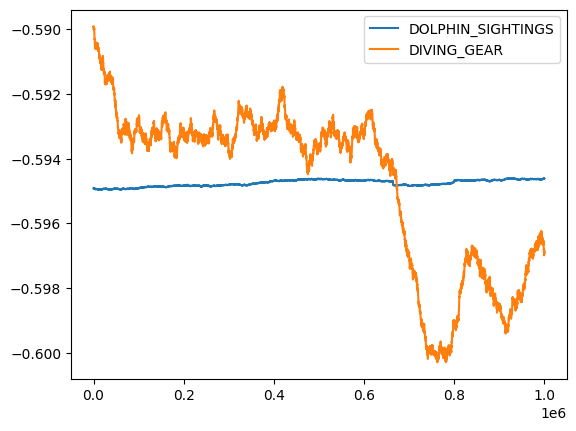

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


#access an excel file that is in desktop, imc_prosperity, data-day3 , island-data-bottle-round-3,  island-data-bottle-round-3, prices_round_3_day_0.csv
df = pd.read_csv('../data/prices_round_3_day_0.csv', sep=";")


# Create a list of the items you want to extract prices for
items = ['DOLPHIN_SIGHTINGS', 'DIVING_GEAR']

# Use the isin() function to filter the DataFrame to only the rows containing the items you want
filtered_df_dolphin = df[df['product'].isin(['DOLPHIN_SIGHTINGS'])]
filtered_df_diving = df[df['product'].isin(['DIVING_GEAR'])]

# Extract the prices column from the filtered DataFrame
prices_dolphin = filtered_df_dolphin['mid_price']
times_dolphin = filtered_df_dolphin['timestamp']
prices_diving = filtered_df_diving['mid_price']
times_diving = filtered_df_diving['timestamp']

#compute the average of prices_dolphin and prices_diving, then subtract the average of prices_diving to all the prices_diving and then add the average of prices_dolphin to all the prices_dolphin
prices_dolphin = prices_dolphin - prices_diving.mean() + prices_dolphin.mean()
prices_diving = prices_diving - prices_diving.mean() + prices_dolphin.mean()

#compute the variance of prices_dolphin and prices_diving, then devide prices_diving by the variance of prices_diving and prices_dolphin by the variance of prices_dolphin
prices_dolphin = prices_dolphin / prices_diving.var()
prices_diving = prices_diving / prices_diving.var()

#now fit an arima model to prices_dolphin and prices_diving

model_dolphin = ARIMA(prices_dolphin, order=(1, 1, 1))
model_diving = ARIMA(prices_diving, order=(1, 1, 1))
model_fit_dolphin = model_dolphin.fit()
model_fit_diving = model_diving.fit()

print(model_fit_dolphin.summary())
print(model_fit_diving.summary())


#plot model_fit_dolphin and model_fit_diving
plt.plot(model_fit_dolphin.fittedvalues, label='DOLPHIN_SIGHTINGS')
plt.plot(model_fit_diving.fittedvalues, label='DIVING_GEAR')
plt.legend()
plt.show()




#plot prices_dolphin vs prices_diving
plt.plot(times_dolphin, prices_dolphin, label='DOLPHIN_SIGHTINGS')
plt.plot(times_diving, prices_diving, label='DIVING_GEAR')
plt.legend()
plt.show()
